<a href="https://colab.research.google.com/github/donaldziff/kgqa-ucb-210/blob/main/W210_lc_quad_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project W210 , Exploratory Data Analysis on lc_quad data set 

In [ ]:
# Google collab premium utilities status check
# GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

print( '\n')

# RAM
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Not connected to a GPU


Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [ ]:
cd /content/drive/MyDrive/W210

[Errno 2] No such file or directory: '/content/drive/MyDrive/W210'
/content


In [ ]:
!pwd

/content


In [ ]:
!wget https://raw.githubusercontent.com/AskNowQA/LC-QuAD2.0/master/dataset/train.json
!wget https://raw.githubusercontent.com/AskNowQA/LC-QuAD2.0/master/dataset/test.json

--2023-02-25 23:46:32--  https://raw.githubusercontent.com/AskNowQA/LC-QuAD2.0/master/dataset/train.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26561843 (25M) [text/plain]
Saving to: ‘train.json’

train.json          100%[===================>]  25.33M   101MB/s    in 0.3s    

2023-02-25 23:46:33 (101 MB/s) - ‘train.json’ saved [26561843/26561843]

--2023-02-25 23:46:33--  https://raw.githubusercontent.com/AskNowQA/LC-QuAD2.0/master/dataset/test.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6578362 (6.3M) [text/pla

In [ ]:
import io
import pandas as pd
import numpy as np

In [ ]:
!pwd

/content


In [ ]:

TRAIN_URL = 'https://raw.githubusercontent.com/AskNowQA/LC-QuAD2.0/master/dataset/train.json'

In [ ]:
train_df= pd.read_json(TRAIN_URL)

In [ ]:
train_df.head()

,NNQT_question,uid,subgraph,template_index,question,sparql_wikidata,sparql_dbpedia18,template,answer,template_id,paraphrased_question
0,What is the {periodical literature} for {mouth...,19719,simple question right,65,What periodical literature does Delta Air Line...,select distinct ?obj where { wd:Q188920 wdt:P...,select distinct ?obj where { ?statement <http:...,<S P ?O ; ?O instanceOf Type>,[],1,What is Delta Air Line's periodical literature...
1,What is {child of} of {husband} of {Ranavalona...,15554,left-subgraph,8,Who is the child of Ranavalona I's husband?,SELECT ?answer WHERE { wd:Q169794 wdt:P26 ?X ....,SELECT ?answer WHERE { ?statement1 <http://www...,C RCD xD . xD RDE ?E,[],5,What is the name of Ranavalona I's husband's c...
2,Did {Jeff_Bridges} {occupation} {Lane Chandler...,974,boolean double one_hop right subgraph,474,Is it true Jeff_Bridges occupation Lane Chandl...,ASK WHERE { wd:Q174843 wdt:P106 wd:Q1804811 . ...,ASK { ?statement1 <http://www.w3.org/1999/02/...,Ask (ent-pred-obj1` . ent-pred-obj2),[],2,Are Jeff Bridges and Lane Chandler both photog...
3,What is {prequel of} of {phase of matter} of {...,15803,right-subgraph,33,What is the pre-requisite of phase matter of G...,SELECT ?answer WHERE { wd:Q675176 wdt:P515 ?X ...,SELECT ?answer WHERE { ?statement1 <http://www...,E REF xF . xF RFG ?G,[],2,What range are the papers at the Monique Genon...
4,What is <operating income> of <Qantas> ?,27610,center,1907,Which is the operating income for Qantas?,select distinct ?answer where { wd:Q32491 wdt:...,select distinct ?answer where { ?statement <ht...,E REF ?F,[],1.1,[]


In [ ]:
with pd.option_context('display.max_colwidth', None):
  display(train_df)

,NNQT_question,uid,subgraph,template_index,question,sparql_wikidata,sparql_dbpedia18,template,answer,template_id,paraphrased_question
0,What is the {periodical literature} for {mouthpiece} of {Delta Air Lines},19719,simple question right,65,What periodical literature does Delta Air Lines use as a moutpiece?,select distinct ?obj where { wd:Q188920 wdt:P2813 ?obj . ?obj wdt:P31 wd:Q1002697 },select distinct ?obj where { ?statement <http://www.w3.org/1999/02/22-rdf-syntax-ns#subject> <http://wikidata.dbpedia.org/resource/Q188920> . ?statement <http://www.w3.org/1999/02/22-rdf-syntax-ns#predicate> <http://www.wikidata.org/entity/P2813> . ?statement <http://www.w3.org/1999/02/22-rdf-syntax-ns#object> ?obj . ?obj <http://www.wikidata.org/entity/P31> <http://wikidata.dbpedia.org/resource/Q1002697> },<S P ?O ; ?O instanceOf Type>,[],1,What is Delta Air Line's periodical literature mouthpiece?
1,What is {child of} of {husband} of {Ranavalona I} ?,15554,left-subgraph,8,Who is the child of Ranavalona I's husband?,SELECT ?answer WHERE { wd:Q169794 wdt:P26 ?X . ?X wdt:P22 ?answer},SELECT ?answer WHERE { ?statement1 <http://www.w3.org/1999/02/22-rdf-syntax-ns#subject> <http://wikidata.dbpedia.org/resource/Q169794> . ?statement1 <http://www.w3.org/1999/02/22-rdf-syntax-ns#predicate> <http://www.wikidata.org/entity/P26>. ?statement1 <http://www.w3.org/1999/02/22-rdf-syntax-ns#object> ?X . ?statement2 <http://www.w3.org/1999/02/22-rdf-syntax-ns#subject> ?X. ?statement2 <http://www.w3.org/1999/02/22-rdf-syntax-ns#predicate> <http://www.wikidata.org/entity/P22> . ?statement2 <http://www.w3.org/1999/02/22-rdf-syntax-ns#object> ?answer . },C RCD xD . xD RDE ?E,[],5,What is the name of Ranavalona I's husband's child?
2,Did {Jeff_Bridges} {occupation} {Lane Chandler} and {photographer} ?,974,boolean double one_hop right subgraph,474,Is it true Jeff_Bridges occupation Lane Chandler and photographer ?,ASK WHERE { wd:Q174843 wdt:P106 wd:Q1804811 . wd:Q174843 wdt:P106 wd:Q33231 },ASK { ?statement1 <http://www.w3.org/1999/02/22-rdf-syntax-ns#subject> <http://wikidata.dbpedia.org/resource/Q174843> . ?statement1 <http://www.w3.org/1999/02/22-rdf-syntax-ns#predicate> <http://www.wikidata.org/entity/P106> . ?statement1 <http://www.w3.org/1999/02/22-rdf-syntax-ns#object> <http://wikidata.dbpedia.org/resource/Q1804811>. ?statement2 <http://www.w3.org/1999/02/22-rdf-syntax-ns#subject> <http://wikidata.dbpedia.org/resource/Q174843> . ?statement2 <http://www.w3.org/1999/02/22-rdf-syntax-ns#predicate> <http://www.wikidata.org/entity/P106> . ?statement2 <http://www.w3.org/1999/02/22-rdf-syntax-ns#object> <http://wikidata.dbpedia.org/resource/Q33231>. },Ask (ent-pred-obj1` . ent-pred-obj2),[],2,Are Jeff Bridges and Lane Chandler both photographers?
3,What is {prequel of} of {phase of matter} of {Galinstan} ?,15803,right-subgraph,33,What is the pre-requisite of phase matter of Galinstan?,SELECT ?answer WHERE { wd:Q675176 wdt:P515 ?X . ?X wdt:P156 ?answer},SELECT ?answer WHERE { ?statement1 <http://www.w3.org/1999/02/22-rdf-syntax-ns#subject> <http://wikidata.dbpedia.org/resource/Q675176> . ?statement1 <http://www.w3.org/1999/02/22-rdf-syntax-ns#predicate> <http://www.wikidata.org/entity/P515>. ?statement1 <http://www.w3.org/1999/02/22-rdf-syntax-ns#object> ?X . ?statement2 <http://www.w3.org/1999/02/22-rdf-syntax-ns#subject> ?X. ?statement2 <http://www.w3.org/1999/02/22-rdf-syntax-ns#predicate> <http://www.wikidata.org/entity/P156> . ?statement2 <http://www.w3.org/1999/02/22-rdf-syntax-ns#object> ?answer . },E REF xF . xF RFG ?G,[],2,What range are the papers at the Monique Genonceaux about?
4,What is <operating income> of <Qantas> ?,27610,center,1907,Which is the operating income for Qantas?,select distinct ?answer where { wd:Q32491 wdt:P3362 ?answer},select distinct ?answer where { ?statement <http://www.w3.org/1999/02/22-rdf-syntax-ns#subject> <http://wikidata.dbpedia.org/resource/Q32491> . ?statement <http://www.w3.org/1999/02/22-rdf-syntax-ns#predicate> <http://

In [ ]:
train_df = train_df.dropna()

In [ ]:
train_df.isnull().sum()

NNQT_question           0
uid                     0
subgraph                0
template_index          0
question                0
sparql_wikidata         0
sparql_dbpedia18        0
template                0
answer                  0
template_id             0
paraphrased_question    0
dtype: int64

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24124 entries, 0 to 24179
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   NNQT_question         24124 non-null  object
 1   uid                   24124 non-null  int64 
 2   subgraph              24124 non-null  object
 3   template_index        24124 non-null  int64 
 4   question              24124 non-null  object
 5   sparql_wikidata       24124 non-null  object
 6   sparql_dbpedia18      24124 non-null  object
 7   template              24124 non-null  object
 8   answer                24124 non-null  object
 9   template_id           24124 non-null  object
 10  paraphrased_question  24124 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.2+ MB


In [ ]:
train_df[:1]

,NNQT_question,uid,subgraph,template_index,question,sparql_wikidata,sparql_dbpedia18,template,answer,template_id,paraphrased_question
0,What is the {periodical literature} for {mouth...,19719,simple question right,65,What periodical literature does Delta Air Line...,select distinct ?obj where { wd:Q188920 wdt:P...,select distinct ?obj where { ?statement <http:...,<S P ?O ; ?O instanceOf Type>,[],1,What is Delta Air Line's periodical literature...


In [ ]:
import seaborn as sns
import sklearn as sklearn


In [ ]:
!pip install empath
from empath import Empath
lexicon = Empath()
# Import module
!pip install NRCLex
from nrclex import NRCLex
import nltk
nltk.download('punkt')
import collections
from collections import Counter
import spacy
nlp =spacy.load("en_core_web_sm")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 KB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for empath: filename=empath-0.89-py3-none-any.whl size=57822 sha256=6484be22775736f1d116764499193e493089260183955f156e433cfd395ffa5c
  Stored in directory: /root/.cache/pip/wheels/2a/e5/c2/fd8dad0a452927c85ecd3c6cbaa4748125246eed73d8303184
Successfully built empath
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 KB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43329 sha256=704f2369fe0a4d246c238707ac86c03bbd60e4c927cb3ed576045d14d4521a65
  Stored in directory: /root/.cache/pip/wheels/83/95/c0/42b43fb15eb48e4f5a67cba8915540cb2783591c59c037a9e5
Successfully built N

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
!pip install textstat
from textstat import flesch_reading_ease


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.0 MB/s eta 0:00:00


In [ ]:
train_df['lexicon'] = train_df['question'].apply(lambda x: ', '.join(f'{key} {str(value)}' for key, value in lexicon.analyze(x).items() if value > 0))
train_df['emotions'] = train_df['question'].apply(lambda x: ', '.join(f'{key} {str(value)}' for key, value in NRCLex(x).raw_emotion_scores.items() if value > 0))
train_df['postags'] =  train_df['question'].apply(lambda x: ', '.join(f'{key.lower()} {str(value)}' for key, value in Counter((token.pos_ for token in nlp(x))).items()))
  

In [ ]:
#get lexicon of the question
train_df['lexicon_key'] = train_df['question'].apply(lambda x: ', '.join(f'{key}' for key, value in lexicon.analyze(x).items() if value > 0))

In [ ]:
#get emotions and part of speech
train_df['emotions_key'] = train_df['question'].apply(lambda x: ', '.join(f'{key}' for key, value in NRCLex(x).raw_emotion_scores.items() if value > 0))
train_df['postags_key'] =  train_df['question'].apply(lambda x: ', '.join(f'{key.lower()}' for key, value in Counter((token.pos_ for token in nlp(x))).items()))
  

In [ ]:
#get entity listings of the question
train_df['entity_key'] =  train_df['question'].apply(lambda x: ', '.join(f'{key.lower()}' for key, value in Counter((token.label_ for token in (nlp(x)).ents)).items()))

#EDA


### We have question word length that is about 100 words, 200 max

<AxesSubplot:>

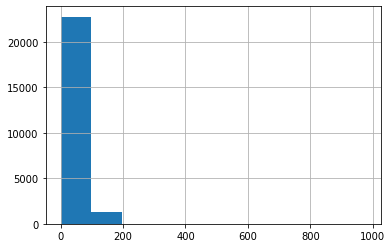

In [ ]:
train_df['question'].str.len().hist()

### avg word length in each question is about 4-6 range

<AxesSubplot:>

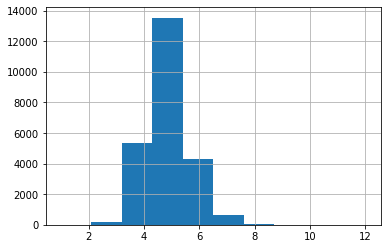

In [ ]:
train_df['question'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

In [ ]:
#analyze words in each question 
import matplotlib.pyplot as plt
nltk.download('stopwords')
from nltk.corpus import stopwords
corpus=[]
question= train_df['question'].str.split()
question=question.values.tolist()
corpus=[word.lower() for i in question for word in i]
stop=set(stopwords.words('english'))
qw = ['what', 'which', 'when', 'where', 'who', 'whom', 'whose', 'why', 'whether', 'how']
from collections import defaultdict
dic=defaultdict(int)
q =defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
    if word in qw:
        q[word]+=1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<BarContainer object of 10 artists>

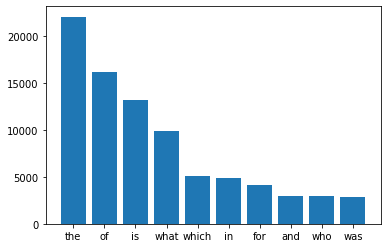

In [ ]:
#plot stop words
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 10 artists>

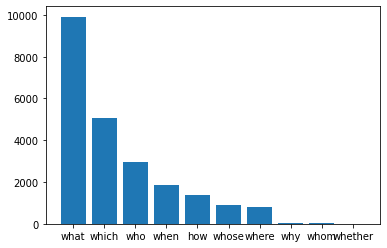

In [ ]:
#plot introgative words
top_q=sorted(q.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top_q)
plt.bar(x,y)

### Subgraph statistics..to be explored further


<AxesSubplot:>

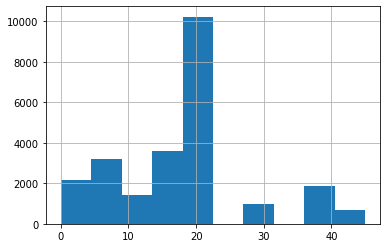

In [ ]:
train_df['subgraph'].str.len().hist()

<AxesSubplot:>

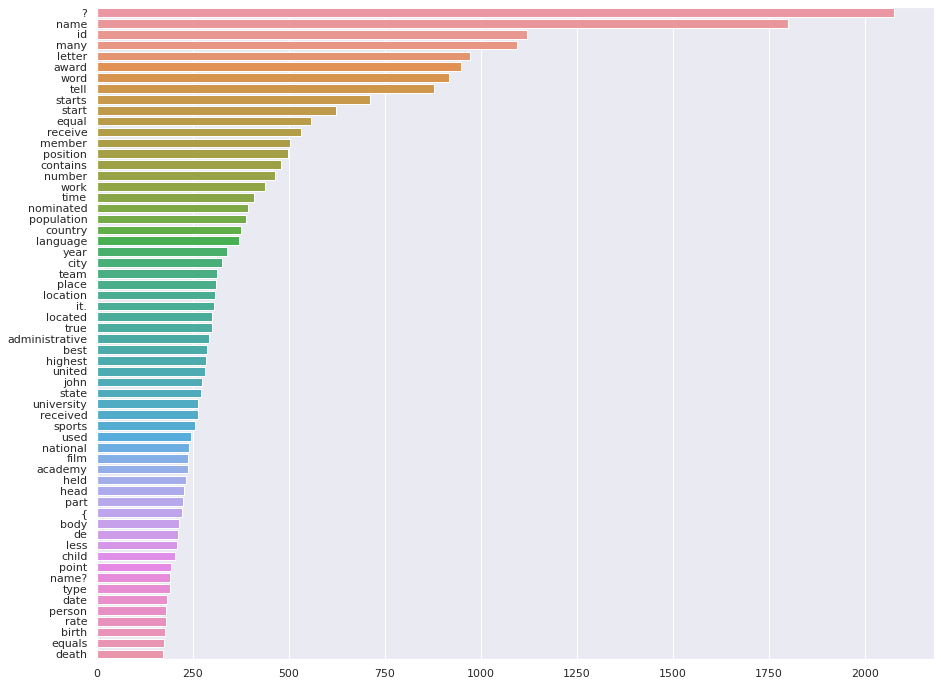

In [ ]:
#freq of non stop words in NL questions
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:100]:
    if (word not in stop and word not in qw):
        x.append(word)
        y.append(count)
sns.set(rc={'figure.figsize':(15,12)})
sns.barplot(x=y,y=x)

<AxesSubplot:>

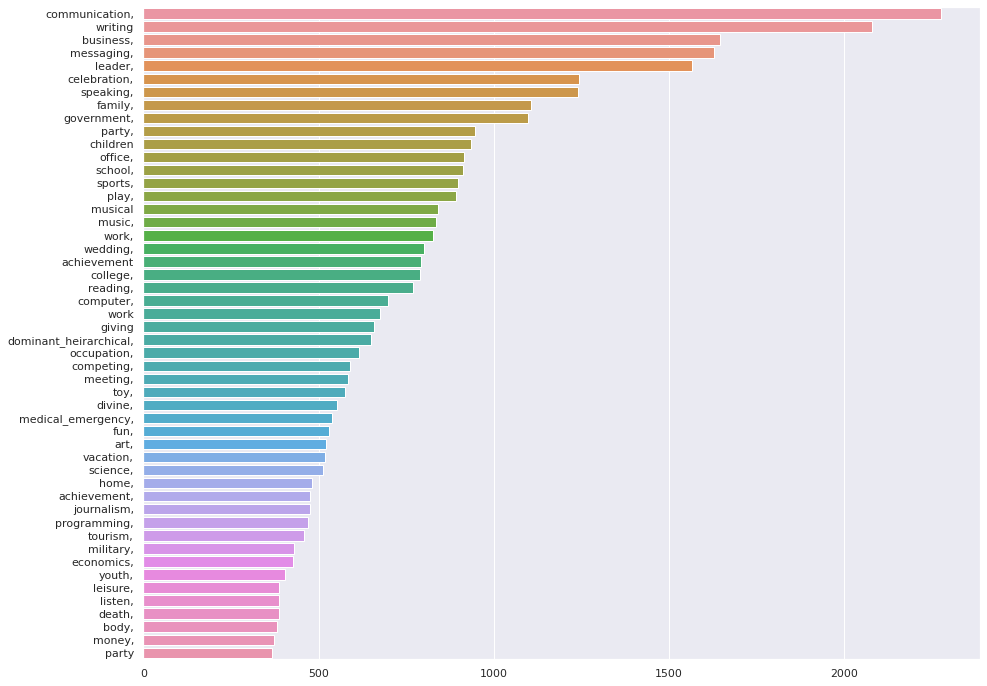

In [ ]:
#part of speech in NL question
lex = Counter([ word.lower() for i in train_df['lexicon_key'].str.split().values.tolist() for word in i])
x, y= [], []
most_lex=lex.most_common()
for word,count in most_lex[:50]:
  x.append(word)
  y.append(count)
sns.set(rc={'figure.figsize':(15,12)})
sns.barplot(x=y,y=x)

<AxesSubplot:>

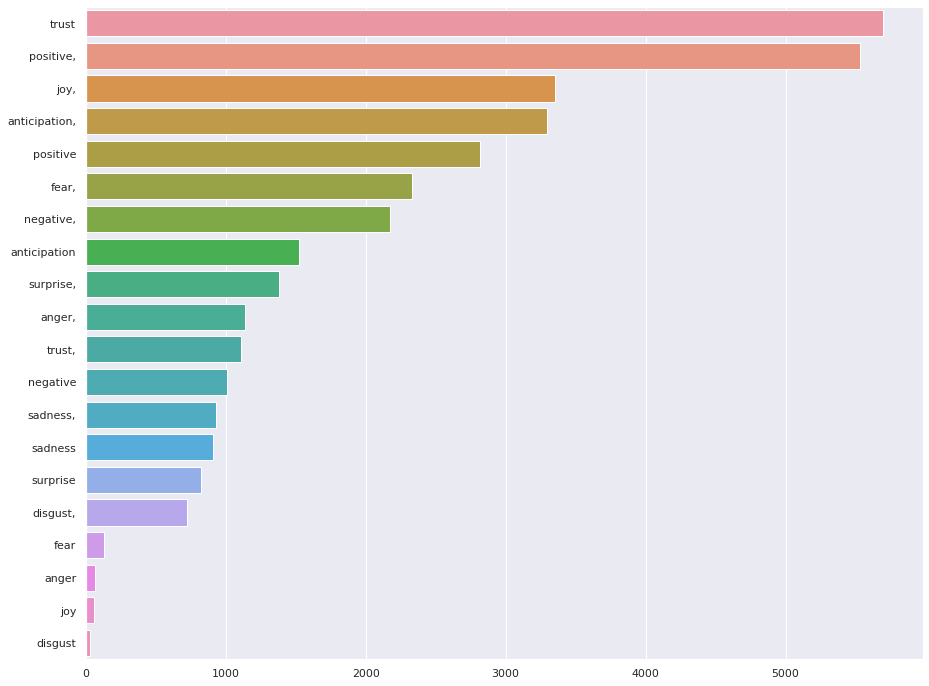

In [ ]:
#Emotions in NL questions
emotions = Counter([ word.lower() for i in train_df['emotions_key'].str.split().values.tolist() for word in i])
x, y= [], []
most_emotions=emotions.most_common()
for word,count in most_emotions[:50]:
  x.append(word)
  y.append(count)
sns.set(rc={'figure.figsize':(15,12)})
sns.barplot(x=y,y=x)

<AxesSubplot:>

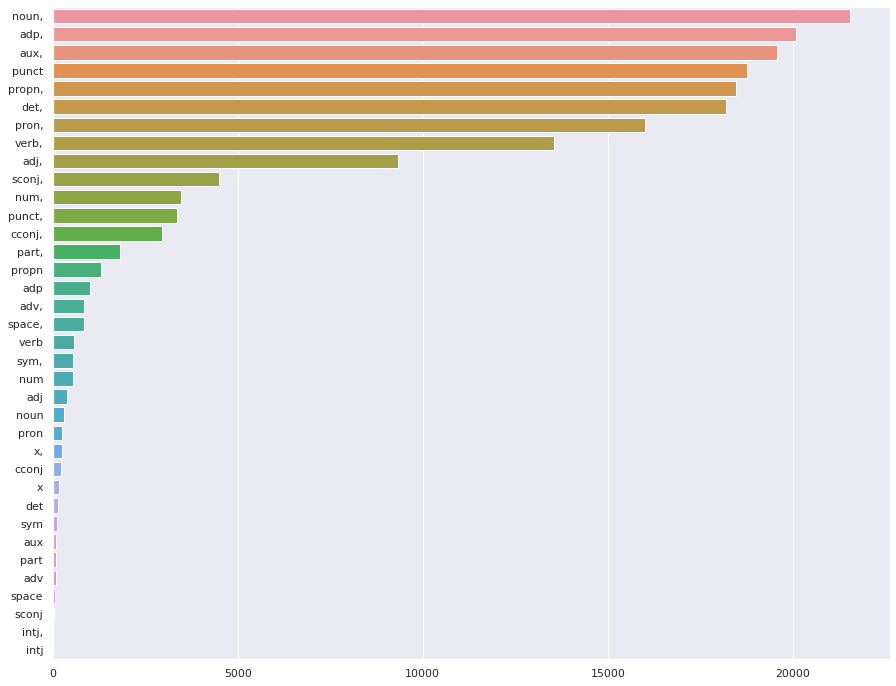

In [ ]:
#part of speech in NL question
pos = Counter([ word.lower() for i in train_df['postags_key'].str.split().values.tolist() for word in i])
x, y= [], []
most_pos=pos.most_common()
for word,count in most_pos[:50]:
  x.append(word)
  y.append(count)
sns.set(rc={'figure.figsize':(15,12)})
sns.barplot(x=y,y=x)

<AxesSubplot:>

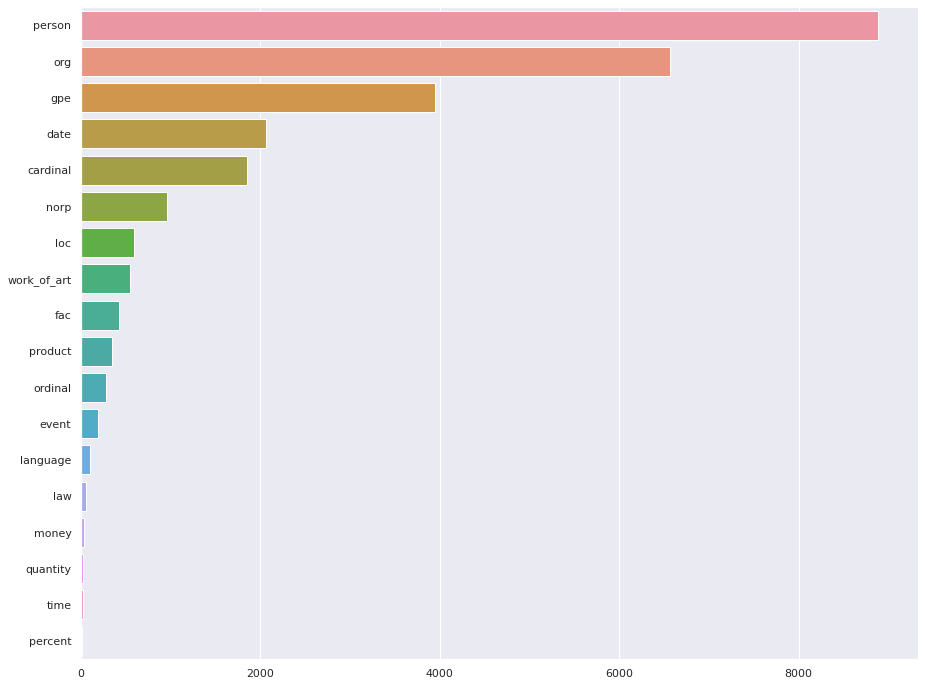

In [ ]:
#entity in NL question
entity = Counter([ word.lower().replace(",","") for i in train_df['entity_key'].str.split().values.tolist() for word in i])
x, y= [], []
most_entity=entity.most_common()
for word,count in most_entity[:50]:
  x.append(word)
  y.append(count)
sns.set(rc={'figure.figsize':(15,12)})
sns.barplot(x=y,y=x)

<AxesSubplot:>

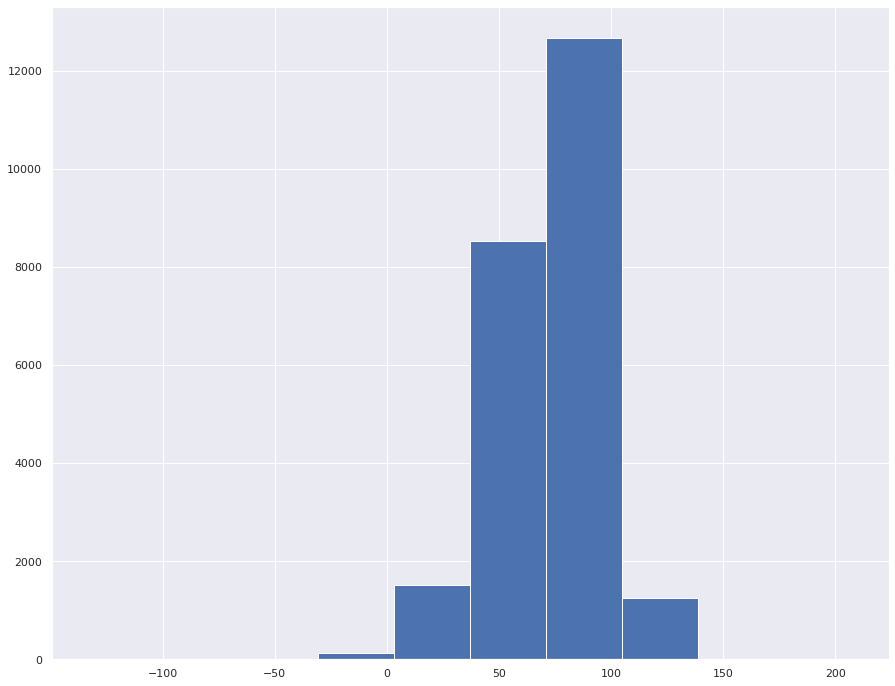

In [ ]:
train_df['question'].apply(lambda x : flesch_reading_ease(x)).hist()

In [ ]:
train_df['ease']=train_df['question'].apply(lambda x : flesch_reading_ease(x))

In [ ]:
train_df['ease']

0         51.85
1         88.74
2         36.96
3         62.34
4         55.91
          ...  
24175     67.76
24176    103.63
24177     84.68
24178     69.79
24179    101.60
Name: ease, Length: 24124, dtype: float64

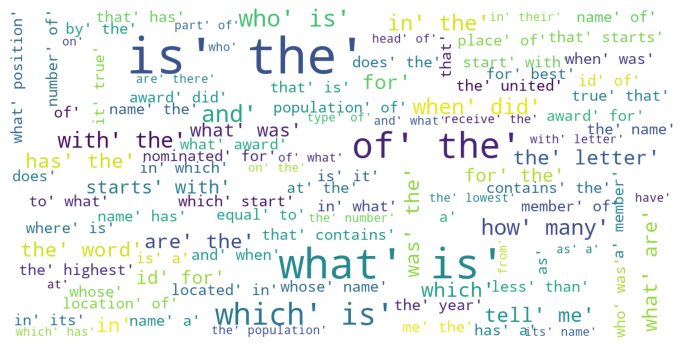

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

In [ ]:
#QALD data set
QALD_URL="https://raw.githubusercontent.com/KGQA/QALD_9_plus/main/data/qald_9_plus_train_wikidata.json"
qald_df= pd.read_json(QALD_URL)

In [ ]:
qald_df

,questions
0,"{'id': '1', 'question': [{'language': 'en', 's..."
1,"{'id': '2', 'question': [{'language': 'en', 's..."
2,"{'id': '3', 'question': [{'language': 'en', 's..."
3,"{'id': '4', 'question': [{'language': 'en', 's..."
4,"{'id': '5', 'question': [{'language': 'en', 's..."
...,...
366,"{'id': '408', 'question': [{'language': 'en', ..."
367,"{'id': '409', 'question': [{'language': 'en', ..."
368,"{'id': '411', 'question': [{'language': 'en', ..."
369,"{'id': '412', 'question': [{'language': 'en', ..."


### team decided not to move forward with the QLAD dataset for now 
